In [42]:
import pandas as pd
import numpy as np
import missingno as msno

In [43]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/TheTitanic.csv', na_values=['**','?'], skiprows=1)

In [44]:
df

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
0,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,NaN,01-Jan-90
1,1,3,0,Mr. Anthony,male,42.0,0.0,7.5500,NaN,01-Jan-90
2,2,3,0,Master. Eugene Joseph,male,NaN,2.0,20.2500,S,02-Jan-90
3,3,2,0,"Abbott, Mr. Rossmore Edward",NaN,NaN,2.0,NaN,S,03-Jan-90
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2.0,20.2500,S,04-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0.0,13.0000,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1.0,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,7.2250,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,7.2250,C,22-Jul-93


In [45]:
df.isna().sum()

sn              0
pclass          0
survived        0
Unnamed: 3      0
gender          1
age           258
family          2
fare            3
embarked        6
date            0
dtype: int64

**Lets Use Drop Function**

In [46]:
df.dropna()

,sn,pclass,survived,Unnamed: 3,gender,age,family,fare,embarked,date
4,4,3,1,"Abbott, Mr. Rossmore Edward",female,35.0,2.0,20.2500,S,04-Jan-90
5,5,3,1,"Abelseth, Miss. Karen Marie",female,16.0,0.0,7.6500,S,05-Jan-90
6,6,3,1,"Abelseth, Mr. Olaus Jorgensen",male,25.0,0.0,7.6500,S,06-Jan-90
7,7,2,0,"Abelson, Mr. Samuel",male,30.0,1.0,24.0000,C,07-Jan-90
8,8,2,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1.0,24.0000,C,08-Jan-90
...,...,...,...,...,...,...,...,...,...,...
1296,1296,2,0,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0.0,13.0000,S,19-Jul-93
1297,1297,3,0,"Zabour, Miss. Hileni",female,14.5,1.0,14.4542,C,20-Jul-93
1298,1298,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,7.2250,C,21-Jul-93
1299,1299,3,0,"Zakarian, Mr. Ortin",male,27.0,0.0,7.2250,C,22-Jul-93


**Fill na**

In [47]:
df['age'].mean()

29.978830297219556

In [48]:
df['age'].fillna(df['age'].mean())

0       42.00000
1       42.00000
2       29.97883
3       29.97883
4       35.00000
          ...   
1296    24.00000
1297    14.50000
1298    26.50000
1299    27.00000
1300    29.00000
Name: age, Length: 1301, dtype: float64

In [49]:
df['fare'].median()

14.4542

In [50]:
df['fare'].fillna(14.45)

0        7.5500
1        7.5500
2       20.2500
3       14.4500
4       20.2500
         ...   
1296    13.0000
1297    14.4542
1298     7.2250
1299     7.2250
1300     7.8750
Name: fare, Length: 1301, dtype: float64

In [51]:
df['gender']

0         male
1         male
2         male
3          NaN
4       female
         ...  
1296    female
1297    female
1298      male
1299      male
1300      male
Name: gender, Length: 1301, dtype: object

In [52]:
df['gender'].bfill()

0         male
1         male
2         male
3       female
4       female
         ...  
1296    female
1297    female
1298      male
1299      male
1300      male
Name: gender, Length: 1301, dtype: object

In [53]:
df['age']

0       42.0
1       42.0
2        NaN
3        NaN
4       35.0
        ... 
1296    24.0
1297    14.5
1298    26.5
1299    27.0
1300    29.0
Name: age, Length: 1301, dtype: float64

In [54]:
df['age'].interpolate()

0       42.000000
1       42.000000
2       39.666667
3       37.333333
4       35.000000
          ...    
1296    24.000000
1297    14.500000
1298    26.500000
1299    27.000000
1300    29.000000
Name: age, Length: 1301, dtype: float64

**Now using Sklearn Algorithms**

In [55]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(strategy= 'constant', fill_value=0)

In [56]:
df[['age', 'fare']]= si.fit_transform(df[['age', 'fare']])

**We need to overwrite**

In [57]:
df[['age', 'fare']]

,age,fare
0,42.0,7.5500
1,42.0,7.5500
2,0.0,20.2500
3,0.0,0.0000
4,35.0,20.2500
...,...,...
1296,24.0,13.0000
1297,14.5,14.4542
1298,26.5,7.2250
1299,27.0,7.2250


**KNN Imputer**

In [58]:
from sklearn.impute import KNNImputer
knni= KNNImputer()

In [59]:
df[['family']]

,family
0,0.0
1,0.0
2,2.0
3,2.0
4,2.0
...,...
1296,0.0
1297,1.0
1298,0.0
1299,0.0


In [60]:
df[['family']]= knni.fit_transform(df[['family']])

In [61]:
df[['family']]

,family
0,0.0
1,0.0
2,2.0
3,2.0
4,2.0
...,...
1296,0.0
1297,1.0
1298,0.0
1299,0.0


**Missing Value Visualization**

In [62]:
import missingno as msno

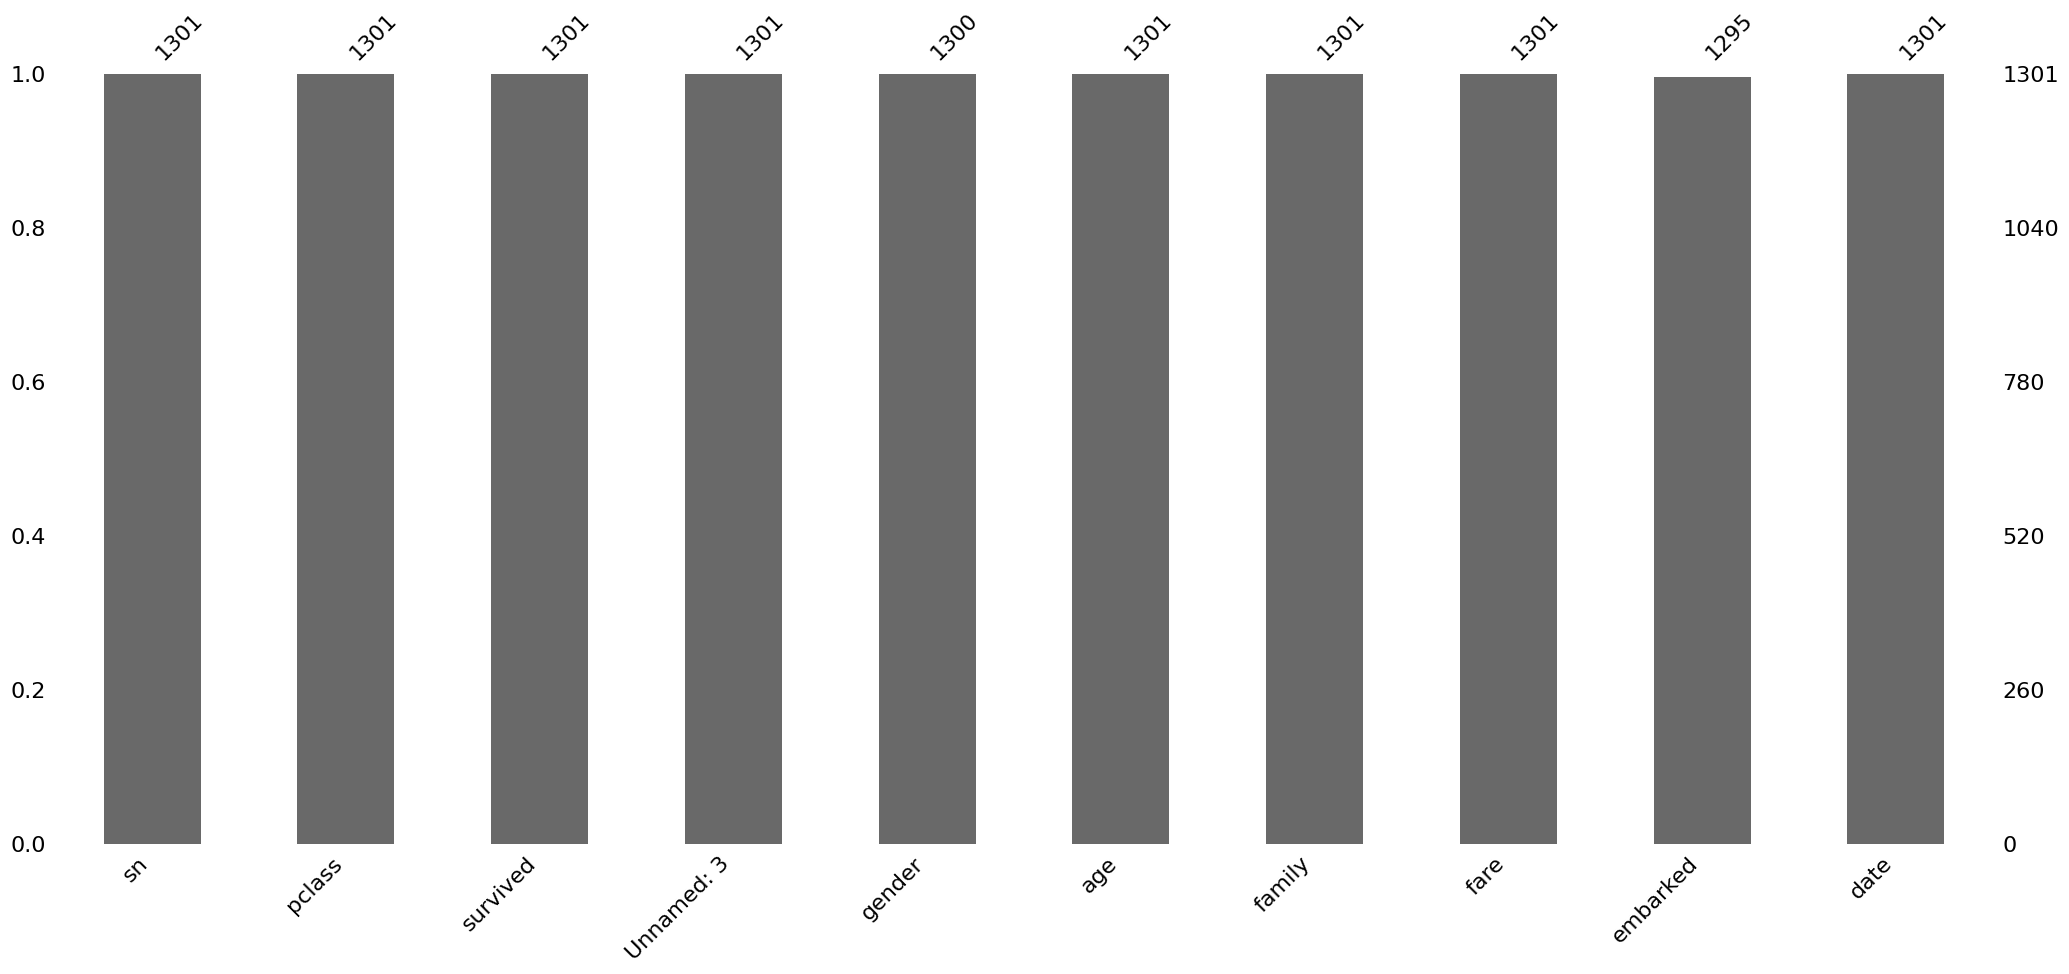

In [63]:
msno.bar(df);

<Axes: >

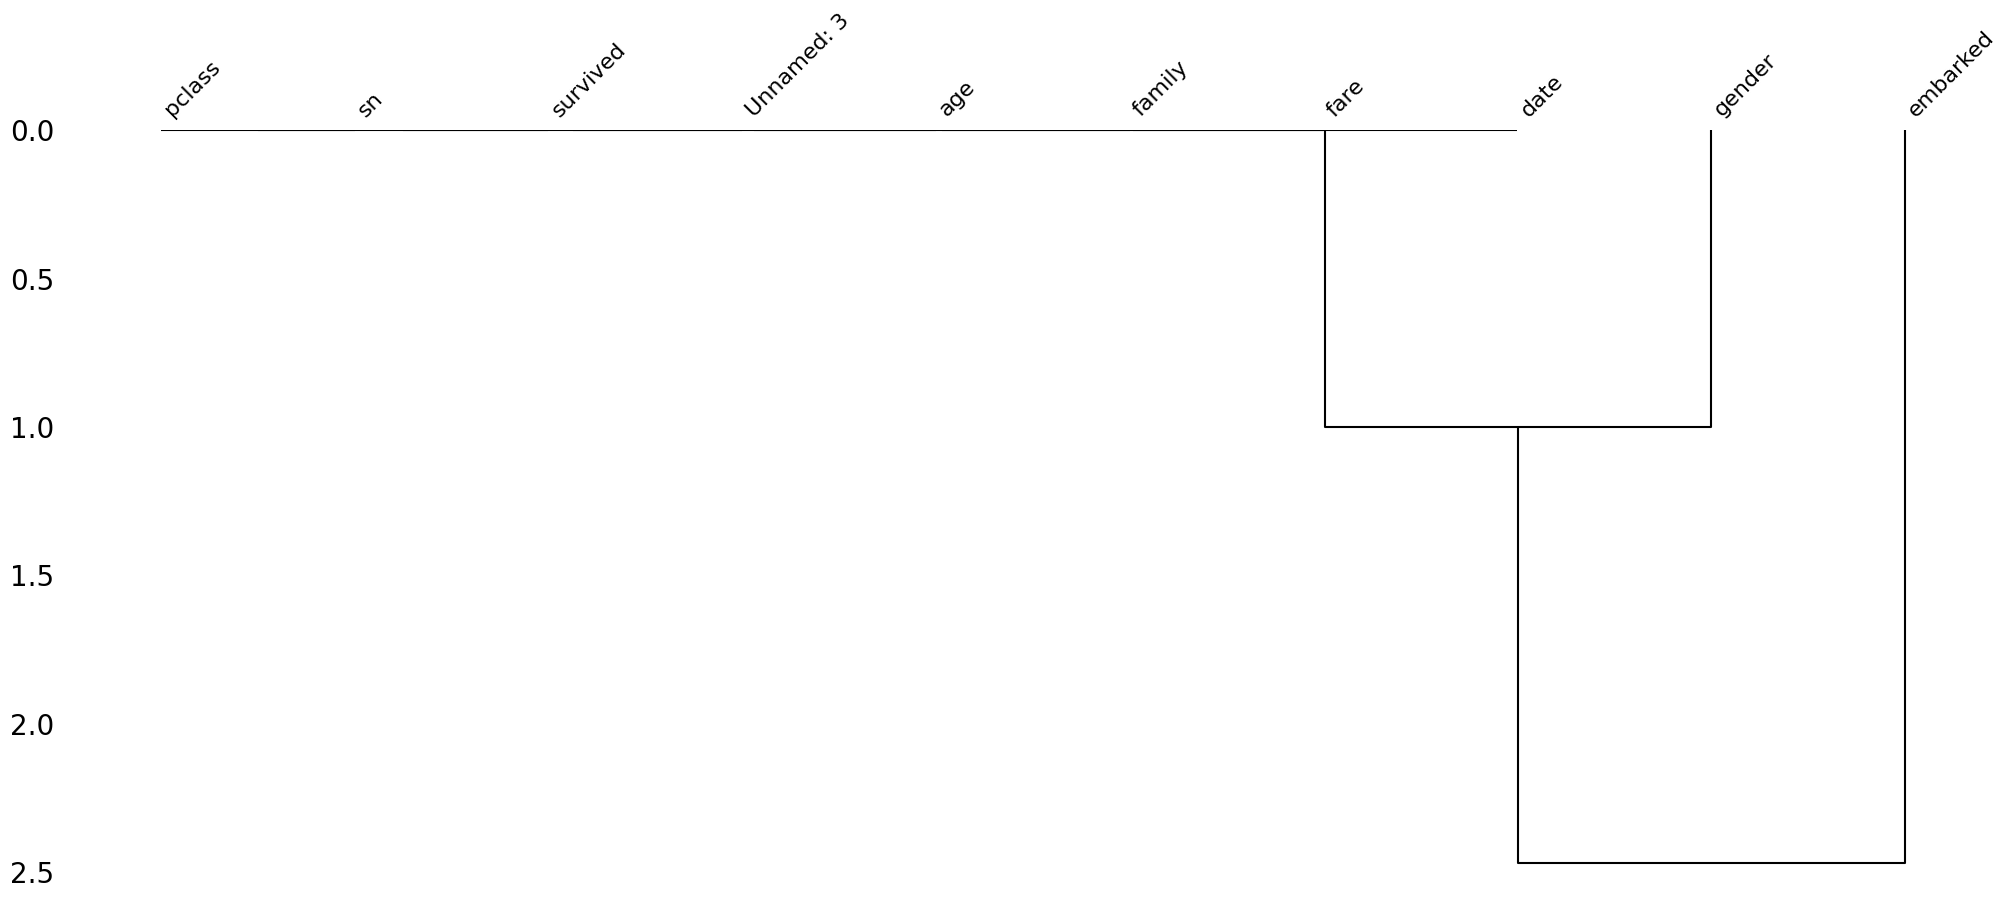

In [64]:
msno.dendrogram(df)

**Encoding**

In [65]:
import pandas as pd

In [66]:
df= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Insurance%20Premium.csv')

In [67]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,yes,south,16885
1,2,18,male,33.770,1,no,east,1726
2,3,28,male,33.000,3,no,east,4449
3,4,33,male,22.705,0,no,west,21984
4,5,32,male,28.880,0,no,west,3867


In [68]:
df.isnull().sum()

ID          0
Age         0
Gender      0
BMI         0
Children    0
Smoker      0
Region      0
Premium     0
dtype: int64

In [69]:
df.Gender.value_counts()

male      676
female    662
Name: Gender, dtype: int64

In [70]:
df.Smoker.value_counts()

no     1064
yes     274
Name: Smoker, dtype: int64

In [71]:
df.Region.value_counts()

east     364
south    325
west     325
north    324
Name: Region, dtype: int64

**Smoker will be charged more hence, it is 1**

In [72]:
df.Smoker.replace({'no':0, 'yes':1}, inplace=True)

In [73]:
df.head()

,ID,Age,Gender,BMI,Children,Smoker,Region,Premium
0,1,19,female,27.900,0,1,south,16885
1,2,18,male,33.770,1,0,east,1726
2,3,28,male,33.000,3,0,east,4449
3,4,33,male,22.705,0,0,west,21984
4,5,32,male,28.880,0,0,west,3867


In [75]:
df= pd.get_dummies(data= df, columns= ['Gender', 'Region'])

In [76]:
df.head()

,ID,Age,BMI,Children,Smoker,Premium,Gender_female,Gender_male,Region_east,Region_north,Region_south,Region_west
0,1,19,27.900,0,1,16885,1,0,0,0,1,0
1,2,18,33.770,1,0,1726,0,1,1,0,0,0
2,3,28,33.000,3,0,4449,0,1,1,0,0,0
3,4,33,22.705,0,0,21984,0,1,0,0,0,1
4,5,32,28.880,0,0,3867,0,1,0,0,0,1


In [78]:
True+1

2

In [79]:
True ==1

True

**Feature Scaling**

In [80]:
df.head()

,ID,Age,BMI,Children,Smoker,Premium,Gender_female,Gender_male,Region_east,Region_north,Region_south,Region_west
0,1,19,27.900,0,1,16885,1,0,0,0,1,0
1,2,18,33.770,1,0,1726,0,1,1,0,0,0
2,3,28,33.000,3,0,4449,0,1,1,0,0,0
3,4,33,22.705,0,0,21984,0,1,0,0,0,1
4,5,32,28.880,0,0,3867,0,1,0,0,0,1


In [81]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [82]:
ss= StandardScaler()
mms= MinMaxScaler()

In [89]:
df[['Agess', 'BMIss']] =ss.fit_transform(df[['Age', 'BMI']])

In [90]:
df[['Agemms', 'BMImms']]=mms.fit_transform(df[['Age', 'BMI']])

In [91]:
df.head()

,ID,Age,BMI,Children,Smoker,Premium,Gender_female,Gender_male,Region_east,Region_north,Region_south,Region_west,Agess,BMIss,Agemms,BMImms
0,1,19,27.900,0,1,16885,1,0,0,0,1,0,-1.438764,-0.453320,0.021739,0.321227
1,2,18,33.770,1,0,1726,0,1,1,0,0,0,-1.509965,0.509621,0.000000,0.479150
2,3,28,33.000,3,0,4449,0,1,1,0,0,0,-0.797954,0.383307,0.217391,0.458434
3,4,33,22.705,0,0,21984,0,1,0,0,0,1,-0.441948,-1.305531,0.326087,0.181464
4,5,32,28.880,0,0,3867,0,1,0,0,0,1,-0.513149,-0.292556,0.304348,0.347592


**Train Test Split**

In [96]:
X= df[['Age', 'BMI']]
y= df['Premium']

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=2529)

**Information Leak**

Training sample knows the incoming mean and std, **NB**: Test sample should be unseen

**Hence Scaling would be always done after the splitting**

---



**Infromation leak will make huge difference because it artificially inc perfromance of the model**

**Steps are as follows**
1. Missing
2. Encoding
3. **Split**
4. Scaling

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [99]:
ss= StandardScaler()


In [100]:
ss.fit(X_train)

StandardScaler()

In [102]:
X_trainss= ss.transform(X_train)
X_testss= ss.transform(X_test)